In [89]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model


In [90]:
df = pd.read_csv('cars.csv')

In [91]:
df.sample(3)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
33673,BMW,330 i,2020,46498.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Rear-wheel Drive,Gasoline,26-36,Blue,Tan,0.0,1.0,0.0,CarMax Columbia - Offering Express Pickup and ...,NaN,4.6,26.0,1000.0,31998.0
560559,Nissan,Frontier SV,2023,5500.0,3.8L V6 24V GDI DOHC,Automatic,Rear-wheel Drive,Gasoline,NaN,Gun Metallic,Charcoal,1.0,1.0,0.0,Nissan of Orange Park,4.6,4.7,5.0,NaN,40000.0
744793,Volkswagen,Passat 3.6L V6 GT,2018,76152.0,3.6L V6 24V GDI DOHC,6-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,19-28,Reflex Silver Metallic w/ Black Roof,Titan Black / Shetland Gray,1.0,1.0,1.0,HGreg.com Orlando,4.8,4.7,98.0,700.0,17797.0


### Now as per the analysis from last trial, we need to seprate the data into differnet manufacturers

In [92]:
df['manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'RAM',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [93]:
df[df['manufacturer'] == 'Acura'].sample(3)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
1677,Acura,TL Technology,2012,128830.0,3.7L V6 24V MPFI SOHC,6-Speed Automatic,All-wheel Drive,Gasoline,18-26,Black,Black,0.0,0.0,1.0,Premier Automotive,4.2,4.7,94.0,1000.0,12995.0
3206,Acura,RDX Technology Package,2019,25669.0,2.0L I4 16V GDI DOHC Turbo,10-Speed Automatic,All-wheel Drive,Gasoline,21-27,White,Ebony,0.0,0.0,1.0,Red Bank Volvo Cars,3.7,4.3,220.0,NaN,32999.0
281,Acura,ILX Premium Package,2019,7127.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-34,Modern Steel Metallic,Ebony,0.0,1.0,1.0,Ed Napleton Acura Kia,3.3,4.7,26.0,1495.0,24495.0


In [94]:
man_lst = df['manufacturer'].unique()

for m in man_lst:
    df_m= df[df['manufacturer'] == m]

    globals()[f'df_{m}'] = df_m

    print(f'df for manufacturer {m} saved as df_{m}')


df for manufacturer Acura saved as df_Acura
df for manufacturer Audi saved as df_Audi
df for manufacturer BMW saved as df_BMW
df for manufacturer Buick saved as df_Buick
df for manufacturer Cadillac saved as df_Cadillac
df for manufacturer Chevrolet saved as df_Chevrolet
df for manufacturer Chrysler saved as df_Chrysler
df for manufacturer Dodge saved as df_Dodge
df for manufacturer Ford saved as df_Ford
df for manufacturer GMC saved as df_GMC
df for manufacturer Honda saved as df_Honda
df for manufacturer Hyundai saved as df_Hyundai
df for manufacturer INFINITI saved as df_INFINITI
df for manufacturer Jaguar saved as df_Jaguar
df for manufacturer Jeep saved as df_Jeep
df for manufacturer Kia saved as df_Kia
df for manufacturer Land Rover saved as df_Land Rover
df for manufacturer Lexus saved as df_Lexus
df for manufacturer Lincoln saved as df_Lincoln
df for manufacturer Mazda saved as df_Mazda
df for manufacturer Mercedes-Benz saved as df_Mercedes-Benz
df for manufacturer Mitsubishi s

In [95]:
df_Ford.shape

(79526, 20)

### Let's start with ford as it is having the largest numbers of record in the whole dataset, we were able to get the a seprate dataframe for, now we can anlyse the `missing values`, `outliers`, observe and handle them properly.

In [96]:
df = df_Ford

In [97]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature", "Unique Values", "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Unique Values,Missing Values,Missing Percentage
0,manufacturer,1,0,0.00
1,model,1156,0,0.00
2,year,92,0,0.00
3,mileage,58525,38,0.05
4,engine,1155,200,0.25
5,transmission,386,720,0.91
6,drivetrain,10,2341,2.94
7,fuel_type,13,3603,4.53
8,mpg,341,21568,27.12
9,exterior_color,1163,1482,1.86


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79526 entries, 190280 to 269805
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   manufacturer         79526 non-null  object 
 1   model                79526 non-null  object 
 2   year                 79526 non-null  int64  
 3   mileage              79488 non-null  float64
 4   engine               79326 non-null  object 
 5   transmission         78806 non-null  object 
 6   drivetrain           77185 non-null  object 
 7   fuel_type            75923 non-null  object 
 8   mpg                  57958 non-null  object 
 9   exterior_color       78044 non-null  object 
 10  interior_color       70333 non-null  object 
 11  accidents_or_damage  77381 non-null  float64
 12  one_owner            76313 non-null  float64
 13  personal_use_only    77237 non-null  float64
 14  seller_name          78745 non-null  object 
 15  seller_rating        55279 non-null

In [99]:
## To analyse some underlying patterns from the string features, we'll create word cloud, what are the trends in the dataset

In [100]:
# Combine all the single words in 'product_name' column into one string
text_model = ' '.join(df['model'].dropna()) 
# text_year = ' '.join(df['year'].dropna())
text_engine = ' '.join(df['engine'].dropna())
text_transmission = ' '.join(df['transmission'].dropna())
text_mpg = ' '.join(df['mpg'].dropna())
text_exterior_color = ' '.join(df['exterior_color'].dropna())
text_interior_color = ' '.join(df['interior_color'].dropna())
text_seller_name = ' '.join(df['seller_name'].dropna())
# text_price = ' '.join(df['price'].dropna())

# Model

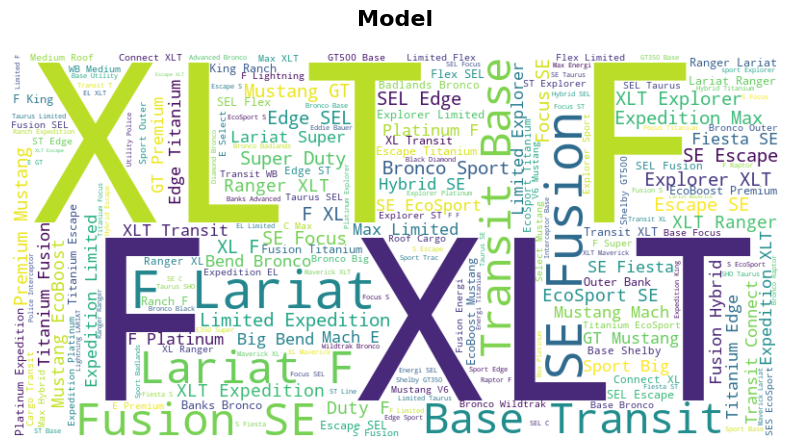

In [101]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_model)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("Model", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

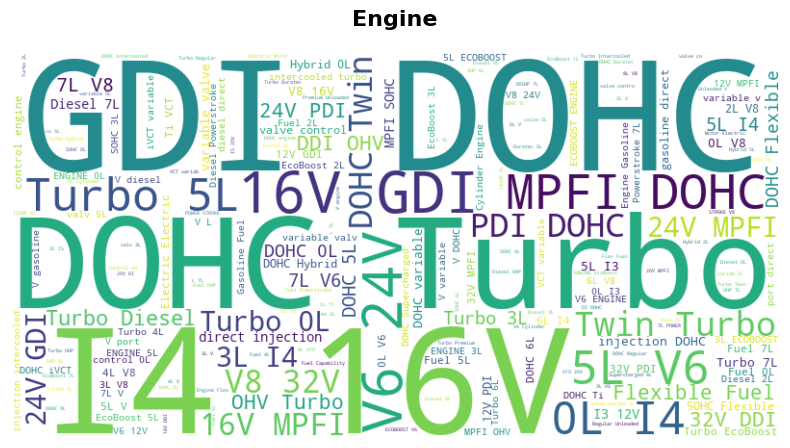

In [102]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_engine)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("Engine", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

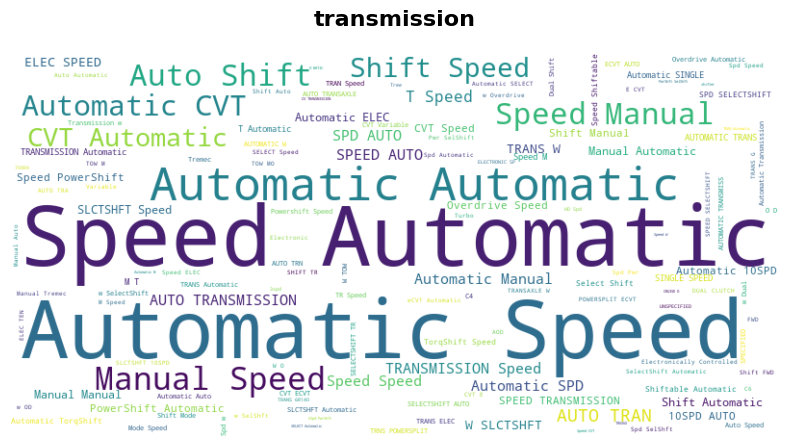

In [103]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_transmission)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("transmission", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

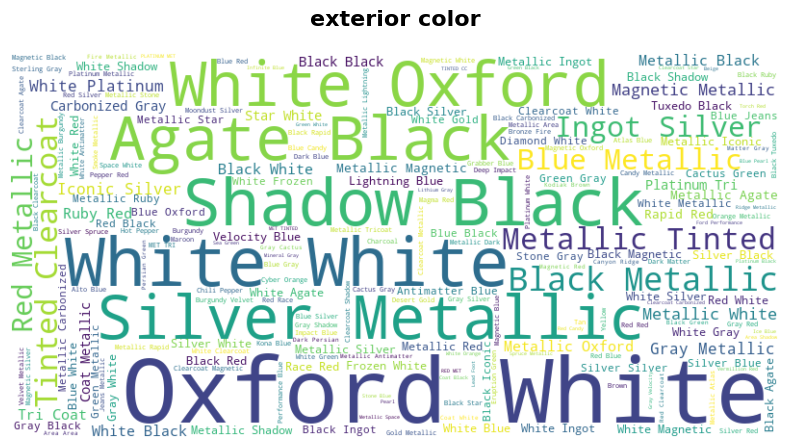

In [104]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_exterior_color)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("exterior color", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

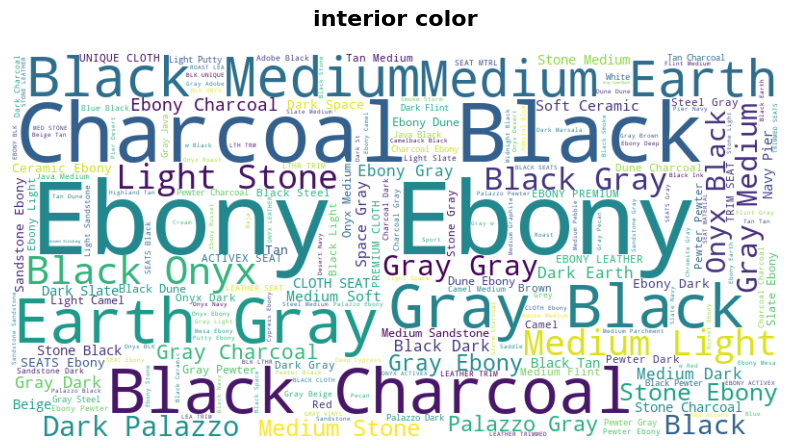

In [105]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_interior_color)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("interior color", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

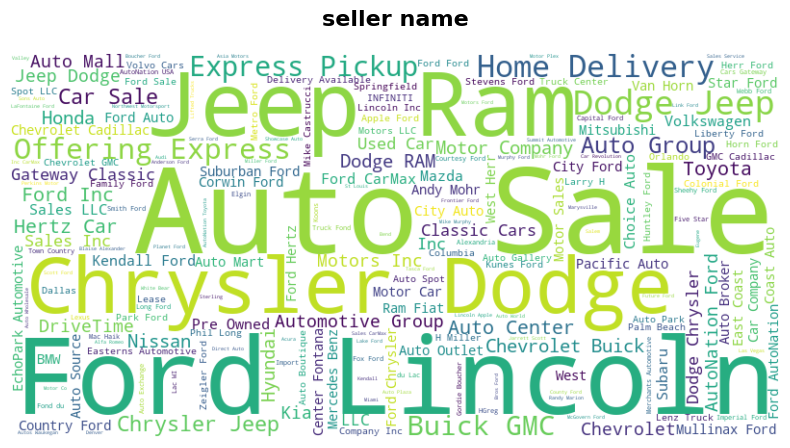

In [106]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_seller_name)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("seller name", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

# Data cleaning : Handling missing values and Preprocessing

### Process breakdown
* `mileage` : Fill method = `median` for `0.05%` missing values 
* `engine`: `mode` for 0.25% missing values 
* `transmission`: fill method = `mode` for `0.9%` missing values 	`
* `drivetrain` :	fill method = `mode` for `3%`	 missing values 
* `fuel_type` : fill method = `mode` for	`4.5%` missing values 	
* `mpg` : fill method = 	`27%`		Impute using median values grouped by `fuel_type`
* `exterior_color` : fill method = `mode` for	`1.8%` missing values 	
* `interior_color` : fill method = `mode` for	`11.5%` missing values 	
* `accidents_or_damage` : fill method = `most_occured` for `2.7%` missing values 	
* `one_owner` : fill method =	`most_occured` for 4% missing values 	
* `personal_use_only` : fill method = `most_occured` for `2.8%` missing values 	
* `seller_name` : fill method = `Drop the column` because of `no relation to the target feature`		
* `seller_rating` : fill method =	`median` for `30%` missing values	
* `driver_rating` : fill method = `median` for `5.8%` missing values	
* `price_drop` : fill method = `Drop the column` because of `a high amount of missing data`

In [107]:
# Let's first seprate the numerical and categorical featres into the respctive categories. Incase if we need to use in further cleaning process.

In [108]:
# ✅ Define Imputation Strategies for Individual Features
impute_methods = {
    "mileage":"median",
    "engine": "most_frequent",
    "transmission": "most_frequent",
    "drivetrain": "most_frequent",
    "fuel_type": "most_frequent",
    # "mpg": , will have to figure out something about this later
    "exterior_color": "most_frequent",
    "interior_color": "most_frequent",
    "accidents_or_damage": "most_frequent",
    "one_owner": "most_frequent",
    "personal_use_only": "most_frequent",
    # "seller_name": "", To be removed
    "seller_rating": "median",
    "driver_rating": "median",
    # "price_drop" To be removed
}

# ✅ Apply the appropriate imputation for each feature
for feature, strategy in impute_methods.items():
    imputer = SimpleImputer(strategy=strategy)
    df[[feature]] = imputer.fit_transform(df[[feature]])


In [109]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature",  "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Missing Values,Missing Percentage
0,manufacturer,0,0.00
1,model,0,0.00
2,year,0,0.00
3,mileage,0,0.00
4,engine,0,0.00
5,transmission,0,0.00
6,drivetrain,0,0.00
7,fuel_type,0,0.00
8,mpg,21568,27.12
9,exterior_color,0,0.00


### Now as per the above observation, we have to drop `price_drop` and `seller_name`, because the `former` is `having nearly 50% missing` data and `later` is `not relevant` for the goal.

In [110]:
# Dropping the features

df.drop(columns=["price_drop", "seller_name"], inplace=True)

### Now there are some modifications needs to be done on the `mpg` feature because the values are in `for eg. 12-18, 10-15, 19-22 format`, we have to fix this and get one average number out of it and then fill the missing values with appropriate mathod.

* Moreover, the `mpg` of any vehicle depends on the type of fuel the particular car is running on, so we need to groupby the fuel_type first to average the mpg for each particular record

In [111]:
# Extracting min and max values from "mpg" format "10-15"
df[['mpg_min', 'mpg_max']] = df["mpg"].str.extract(r'(\d+)-(\d+)')

# Converting to numeric & calculate the average
df["mpg"] = df[['mpg_min', 'mpg_max']].astype(float).mean(axis=1)

# Computing median MPG for each fuel_type
mpg_medians = df.groupby("fuel_type")["mpg"].median()

# Filling missing MPG values with the median of the respective `fuel_type`
df["mpg"] = df.apply(lambda row: mpg_medians[row["fuel_type"]] if pd.isna(row["mpg"]) else row["mpg"], axis=1)

# Filling the remaninig values with overall median of the mpg if there is any
df["mpg"].fillna(df["mpg"].median(), inplace=True)


# Dropping temporary columns
df.drop(columns=["mpg_min", "mpg_max"], inplace=True)

C:\Users\rajgo\AppData\Local\Temp\ipykernel_36760\3374362713.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mpg"].fillna(df["mpg"].median(), inplace=True)


#### Let's now check if there is missing values anymore in our dataset

In [112]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature",  "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Missing Values,Missing Percentage
0,manufacturer,0,0.0
1,model,0,0.0
2,year,0,0.0
3,mileage,0,0.0
4,engine,0,0.0
5,transmission,0,0.0
6,drivetrain,0,0.0
7,fuel_type,0,0.0
8,mpg,0,0.0
9,exterior_color,0,0.0


In [113]:
df.nunique()

manufacturer               1
model                   1156
year                      92
mileage                58526
engine                  1155
transmission             386
drivetrain                10
fuel_type                 13
mpg                       81
exterior_color          1163
interior_color           810
accidents_or_damage        2
one_owner                  2
personal_use_only          2
seller_rating             41
driver_rating             23
driver_reviews_num       169
price                  21815
dtype: int64

### Now that we have cleaned the dataset from any missing values, further we have to convert the `object/string` values into `numerical representation` to feed it to the ML algorithm. And find outliers and treat them with a proper method.

In [114]:
df.sample(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price
214303,Ford,F-250 XL,2016,100600.0,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,0.0,Oxford White,Steel,0.0,0.0,1.0,4.1,4.6,69.0,41898.0
220578,Ford,Transit-350,2018,20705.0,3.7L V6 24V MPFI DOHC,6-Speed Automatic,Rear-wheel Drive,Gasoline,23.5,White,Ebony,0.0,1.0,0.0,4.3,4.2,9.0,42800.0
264296,Ford,Mustang EcoBoost Premium,2017,1457.0,2.3L I4 16V GDI DOHC Turbo,6-Speed Manual,Rear-wheel Drive,Gasoline,25.5,Oxford White,Ebony,0.0,0.0,1.0,4.8,4.8,295.0,27180.0
261561,Ford,Escape SE,2017,123272.0,2.0L I4 Turbocharger,Automatic,Four-wheel Drive,Gasoline,0.0,Silver,Gray,0.0,0.0,1.0,4.2,4.6,765.0,11999.0
245463,Ford,Fiesta SE,2019,75935.0,1.6L I4 16V MPFI DOHC,6-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,31.0,Charcoal,Black,0.0,0.0,0.0,3.9,4.6,76.0,12200.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79526 entries, 190280 to 269805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   manufacturer         79526 non-null  object 
 1   model                79526 non-null  object 
 2   year                 79526 non-null  int64  
 3   mileage              79526 non-null  float64
 4   engine               79526 non-null  object 
 5   transmission         79526 non-null  object 
 6   drivetrain           79526 non-null  object 
 7   fuel_type            79526 non-null  object 
 8   mpg                  79526 non-null  float64
 9   exterior_color       79526 non-null  object 
 10  interior_color       79526 non-null  object 
 11  accidents_or_damage  79526 non-null  float64
 12  one_owner            79526 non-null  float64
 13  personal_use_only    79526 non-null  float64
 14  seller_rating        79526 non-null  float64
 15  driver_rating        79526 non-null

#### Maybe we have to convert the float features into integer.


df = df.apply(lambda col: col.astype(int) if col.dtype == 'float64' else col)


In [116]:
# Assuming df is your dataset
label_encoder = LabelEncoder()

# For categorical columns that you want to embed
df['model'] = label_encoder.fit_transform(df['model'])
df['engine'] = label_encoder.fit_transform(df['engine'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['exterior_color'] = label_encoder.fit_transform(df['exterior_color'])
df['interior_color'] = label_encoder.fit_transform(df['interior_color'])

# For numeric columns, you can use them as they are
numeric_columns = ['year', 'mileage', 'mpg', 'accidents_or_damage', 'one_owner', 'personal_use_only', 
                   'seller_rating', 'driver_rating', 'driver_reviews_num']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)


# Number of unique values (plus 1 for unknown)
num_model = len(df['model'].unique())
num_engine = len(df['engine'].unique())
num_transmission = len(df['transmission'].unique())
num_exterior = len(df['exterior_color'].unique())
num_interior = len(df['interior_color'].unique())

# Embedding dimensions - adjusted heuristically or based on experimentation
embedding_dim_model = 32  # √1156 ≈ 34, choose ~32 for model
embedding_dim_engine = 32  # √1155 ≈ 34, choose ~32 for engine
embedding_dim_transmission = 20  # √386 ≈ 20 for transmission
embedding_dim_exterior = 32  # √1163 ≈ 34, choose ~32 for exterior_color
embedding_dim_interior = 28  # √810 ≈ 28 for interior_color



# Define the input layers for each feature
input_model = Input(shape=(1,), name='model_input')
input_engine = Input(shape=(1,), name='engine_input')
input_transmission = Input(shape=(1,), name='transmission_input')
input_exterior = Input(shape=(1,), name='exterior_color_input')
input_interior = Input(shape=(1,), name='interior_color_input')

# Embedding layers
embedding_model = Embedding(input_dim=num_model + 1, output_dim=embedding_dim_model)(input_model)
embedding_engine = Embedding(input_dim=num_engine + 1, output_dim=embedding_dim_engine)(input_engine)
embedding_transmission = Embedding(input_dim=num_transmission + 1, output_dim=embedding_dim_transmission)(input_transmission)
embedding_exterior = Embedding(input_dim=num_exterior + 1, output_dim=embedding_dim_exterior)(input_exterior)
embedding_interior = Embedding(input_dim=num_interior + 1, output_dim=embedding_dim_interior)(input_interior)

# Flatten embeddings
flat_model = Flatten()(embedding_model)
flat_engine = Flatten()(embedding_engine)
flat_transmission = Flatten()(embedding_transmission)
flat_exterior = Flatten()(embedding_exterior)
flat_interior = Flatten()(embedding_interior)

# Numeric inputs for features like year, mileage, etc.
input_numeric = Input(shape=(len(numeric_columns),), name='numeric_inputs')

# Concatenate all inputs
concatenated = Concatenate()([flat_model, flat_engine, flat_transmission, flat_exterior, flat_interior, input_numeric])

# Dense layers after concatenation
x = Dense(64, activation='relu')(concatenated)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear')(x)  # Regression output for price

# Define and compile the model
model = Model(inputs=[input_model, input_engine, input_transmission, input_exterior, input_interior, input_numeric],
              outputs=output)
model.compile(optimizer='adam', loss='mse')

# Print summary
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ model_input (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ engine_input (InputLayer)     │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ transmission_input            │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ exterior_color_input          │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ interior_color_input          │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_20 (Embedding)      │ (None, 1, 32)             │          37,024 │ model_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_21 (Embedding)      │ (None, 1, 32)             │          36,992 │ engine_input[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_22 (Embedding)      │ (None, 1, 20)             │           7,740 │ transmission_input[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_23 (Embedding)      │ (None, 1, 32)             │          37,248 │ exterior_color_input[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_24 (Embedding)      │ (None, 1, 28)             │          22,708 │ interior_color_input[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_25 (Flatten)          │ (None, 32)                │               0 │ embedding_20[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_26 (Flatten)          │ (None, 32)                │               0 │ embedding_21[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_27 (Flatten)          │ (None, 20)                │               0 │ embedding_22[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_28 (Flatten)          │ (None, 32)                │               0 │ embedding_23[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_29 (Flatten)          │ (None, 28)                │               0 │ embedding_24[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ numeric_inputs (InputLayer)   │ (None, 9)                 │               

 Total params: 153,681 (600.32 KB)

 Trainable params: 153,681 (600.32 KB)

 Non-trainable params: 0 (0.00 B)